In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
import os
PATH = os.getcwd()
sys.path.append(PATH)

In [2]:
import pandas as pd
import numpy as np

import os
import pickle
import random
import joblib

import EncoderFactory
#from DatasetManager_for_colab import DatasetManager
from DatasetManager import DatasetManager
import BucketFactory

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
#import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

sns.set_theme('paper', 'darkgrid')
sns.set_palette("hls")
cmap = sns.color_palette("copper", as_cmap=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from scipy.stats import tmean, scoreatpercentile
def trimmean(arr, percent = 0.5):
    lower_limit = scoreatpercentile(arr, percent/2)
    upper_limit = scoreatpercentile(arr, 100-percent/2)
    #print(lower_limit, upper_limit)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(True, True))

# Pick and Choose

In [50]:
dataset_name = "nursery"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/" %(dataset_name,model))

#num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

sample = pd.read_csv(os.path.join(folder_loc, "test_sample.csv"), sep=";")
vec_lens.append(sample.shape[1])

print("Input length:", vec_lens)
                     
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.read_csv(os.path.join(folder_loc, "results.csv"), sep=";").fillna(1)
#grouped = results.groupby("Prefix Length")

print ("SHAP Subset Stability")
print("Overall", np.mean(results["SHAP Subset Stability"]))

print ("SHAP Weight Stability")
print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))

print ("LIME Subset Stability")
print("Overall", np.mean(results["LIME Subset Stability"]))

print ("LIME Weight Stability")
print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))

print ("ACV Subset Stability")
print("Overall", np.mean(results["ACV Subset Stability"]))

print ("ACV Weight Stability")
print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))

print ("LINDA-BN Subset Stability")
print("Overall", np.mean(results["LINDA Subset Stability"]))

print ("LINDA-BN Weight Stability")
print("Overall", np.mean(results["LINDA Adjusted Weight Stability"]))

#np.mean(results[results.columns[3:]])

Input length: [27]
SHAP Subset Stability
Overall 1.0
SHAP Weight Stability
Overall 0.9999472840099999
LIME Subset Stability
Overall 1.0
LIME Weight Stability
Overall 0.9951345286600001
ACV Subset Stability
Overall 1.0
ACV Weight Stability
Overall 1.0
LINDA-BN Subset Stability
Overall 1.0
LINDA-BN Weight Stability
Overall 1.0


SHAP Subset Stability
Overall 0.9400540650413879
SHAP Weight Stability
Overall 0.9350696129909768
LIME Subset Stability
Overall 0.9848118975399116


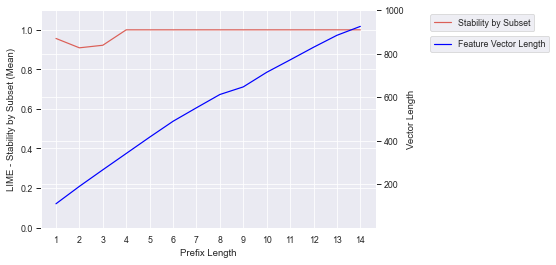

LIME Weight Stability
Overall 0.9953638987238874


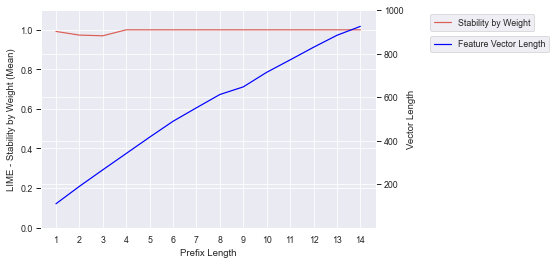

ACV Subset Stability
Overall 1.0


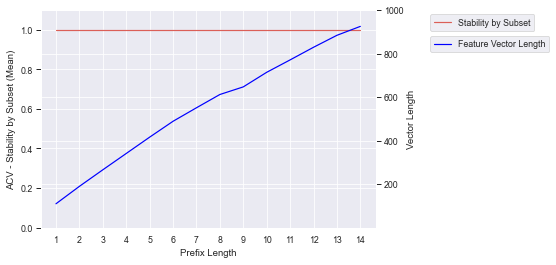

ACV Weight Stability
Overall 1.0


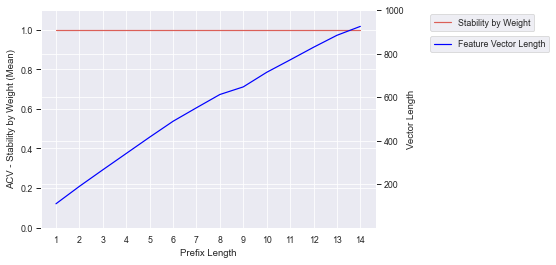

LINDA-BN Subset Stability


KeyError: 'LINDA-BN Subset Stability'

In [68]:
dataset_name = "production"
bucket = "prefix"
encoding="index"
model="nb"

folder_loc = os.path.join(PATH, "%s/%s/%s_%s/" %(dataset_name,model, bucket, encoding))

num_buckets = len([name for name in os.listdir(os.path.join(folder_loc,'pipelines/'))])

vec_lens = []

for bucket in range(1, num_buckets+1):
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    vec_lens.append(sample.shape[1])
    
if len(vec_lens) == 1:
    vec_lens = vec_lens * 14
    
pref_lens = np.arange(1,15,1)
x_ticks = np.arange(1,15,1)

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"), sep=";").fillna(1)
grouped = results.groupby("Prefix Length")

print ("SHAP Subset Stability")
print("Overall", np.mean(results["SHAP Subset Stability"]))
# stab = grouped["SHAP Subset Stability"].mean()
# fig, ax1 = plt.subplots()
# ax1.plot(pref_lens, stab)
# ax2 = ax1.twinx()
# ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
# ax1.set_xticks(x_ticks)
# ax1.set_ylim(0,1.1)
# ax2.set_ylim(1,1400)
# plt.xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Subset (Mean)")
# ax2.set_ylabel("Vector Length")
# plt.show()

print ("SHAP Weight Stability")
print("Overall", np.mean(results["SHAP Adjusted Weight Stability"]))
# stab = grouped["SHAP Adjusted Weight Stability"].mean()
# fig, ax1 = plt.subplots()
# ax1.plot(pref_lens, stab)
# ax2 = ax1.twinx()
# ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
# ax1.set_xticks(x_ticks)
# ax1.set_ylim(0,1.1)
# ax2.set_ylim(1,1400)
# plt.xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Weight (Mean)")
# ax2.set_ylabel("Vector Length")
# plt.show()

print ("LIME Subset Stability")
print("Overall", np.mean(results["LIME Subset Stability"]))
stab = grouped["LIME Subset Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Subset")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0,1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

print ("LIME Weight Stability")
print("Overall", np.mean(results["LIME Adjusted Weight Stability"]))
stab = grouped["LIME Adjusted Weight Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Weight")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

print ("ACV Subset Stability")
print("Overall", np.mean(results["ACV Subset Stability"]))
stab = grouped["ACV Subset Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Subset")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0,1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("ACV - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

print ("ACV Weight Stability")
print("Overall", np.mean(results["ACV Adjusted Weight Stability"]))
stab = grouped["ACV Adjusted Weight Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Weight")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("ACV - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

print ("LINDA-BN Subset Stability")
print("Overall", np.mean(results["LINDA-BN Subset Stability"]))
stab = grouped["LINDA-BN Subset Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Subset")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0,1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LINDA-BN - Stability by Subset (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

print ("LINDA-BN Weight Stability")
print("Overall", np.mean(results["LINDA-BN Adjusted Weight Stability"]))
stab = grouped["LINDA-BN Adjusted Weight Stability"].mean()
fig, ax1 = plt.subplots()
ax1.plot(pref_lens[:len(stab)], stab, label = "Stability by Weight")
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], vec_lens, label = "Feature Vector Length", color = 'blue')
ax1.set_xticks(x_ticks)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(1,1000)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LINDA-BN - Stability by Weight (Mean)")
ax2.set_ylabel("Vector Length")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

In [5]:
len(pref_lens)

14

In [6]:
len(vec_lens)

15

In [ ]:
stab

In [ ]:
print("Smallest vector length: %s. Largest vector length: %s." % (min(vec_lens), max(vec_lens)))

results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv")).fillna(1)

prefixes = results["Prefix Length"].tolist()
vectors = [vec_lens[int(i)-1] for i in prefixes]
results["Vector Lengths"] = vectors

vector_groups = results.groupby('Vector Lengths')

vec_based_stab = vector_groups["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
sns.scatterplot(results["Vector Lengths"], results["LIME Subset Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(results["Vector Lengths"].unique(), vec_based_stab, legend = 'full', 
             label='Mean Stability for Vector Length', color = 'black')
#plt.xlim(1, 21)
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Vector Length")
ax1.set_ylabel("LIME - Stability by Subset")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()


vec_based_stab = vector_groups["LIME Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.scatterplot(results["Vector Lengths"], results["LIME Weight Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(results["Vector Lengths"].unique(), vec_based_stab, legend = 'full', label='Mean Stability for Vector Length')
#plt.xlim(1, 21)
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Vector Length")
ax1.set_ylabel("LIME - Stability by Weight")
ax2.set_ylabel("LIME - Stability by Weight (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()

In [ ]:
stab = grouped["LIME Subset Stability"].mean()


# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax1 = plt.subplots()
sns.scatterplot(results["Prefix Length"], results["LIME Subset Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, legend = 'full', label='Mean Stability for Prefix Length', color = 'black')
ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_ylim(0,1.1)
ax2.set_ylim(0,1.1)
plt.xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Subset")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()


#map = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax1 = plt.subplots()
sns.scatterplot(results["Prefix Length"], results["LIME Adjusted Weight Stability"], 
                hue = results["Prediction Probability"], palette = cmap)
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, legend = 'full', label='Mean Stability for Prefix Length')
plt.xlim(1, 21)
ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
#plt.ylim(0,1.1)
plt.xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight")
ax2.set_ylabel("LIME - Stability by Weight (Mean)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.6), loc = 'upper left')
plt.show()


In [ ]:
raw_results = pd.read_csv(os.path.join(folder_loc, "samples/results.csv"))

print("Overall SHAP empty results\t", raw_results["SHAP Subset Stability"].isna().sum()/len(raw_results["SHAP Subset Stability"]))
print("Overall LIME empty results\t", raw_results["LIME Subset Stability"].isna().sum()/len(raw_results["LIME Subset Stability"]))

shap_empty = []
lime_empty = []

for i in range(1, 21):
    #print("Bucket", i)
    raw_len_res = raw_results[raw_results["Prefix Length"]==i]
    shap_empty.append(raw_len_res["SHAP Subset Stability"].isna().sum()/len(raw_len_res["SHAP Subset Stability"]))
    lime_empty.append(raw_len_res["LIME Subset Stability"].isna().sum()/len(raw_len_res["LIME Subset Stability"]))
    #print(lime_empty[i-1])
    
stab = grouped["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'red')
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability", color='black')
#ax1.set_xticks(np.arange(0, 21, 1))
ax1.set_xticks(pref_lens)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax2.set_ylabel("LIME - Stability by Subset (Mean)")
ax1.set_ylabel("LIME - Proportion of Empty Explanations")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.grid(True, color='w', linestyle='-', linewidth=3)
#sns.set_style('darkgrid')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
#ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Weight Stability")
plt.xlim(0, 21)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("LIME - Proportion of Empty Explanations")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()


# stab = grouped["SHAP Subset Stability"].mean()

# fig, ax1 = plt.subplots()
# sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability")
# ax2 = ax1.twinx()
# sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
# plt.xlim(1, 21)
# ax1.set_ylim(-0.1, 1.1)
# ax2.set_ylim(-0.1, 1.1)
# #plt.ylim(0,1.1)
# ax1.set_xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Subset (Mean)")
# ax2.set_ylabel("SHAP - Proportion of Empty Explanations")
# ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
# ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
# plt.show()

# stab = grouped["SHAP Adjusted Weight Stability"].mean()

# fig, ax1 = plt.subplots()
# sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Weight Stability")
# ax2 = ax1.twinx()
# sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty Explanations", color = 'blue')
# plt.xlim(1, 21)
# ax1.set_ylim(-5, 1.1)
# ax2.set_ylim(-0.1, 1.1)
# #plt.ylim(0,1.1)
# ax1.set_xlabel("Prefix Length")
# ax1.set_ylabel("SHAP - Stability by Weight (Mean)")
# ax2.set_ylabel("SHAP - Proportion of Empty Explanations")
# ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
# ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
# plt.show()



In [ ]:
accs = []

for bucket in range(1, num_buckets+1):
    acc_per_len = []
    
    pipeline = joblib.load(os.path.join(folder_loc, "pipelines/pipeline_bucket_%s.joblib" % (bucket)))
    cls = pipeline['cls']
    if 'scaler' in pipeline.named_steps:
        scaler = pipeline['scaler']
    else:
        scaler = None
    
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket)))
    results = pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)))
    data = pd.concat([sample, results], axis = 1)
    
    for i in data["Prefix Length"].unique():
        len_data = data[data["Prefix Length"] == i]
        y = len_data["Actual"].tolist()
        irrelevant_cols = ["Case ID", "Actual", "Prefix Length", "Prediction", "Prediction Probability"]
        relevant_cols = [col for col in len_data.columns if col not in irrelevant_cols]
        x = len_data[relevant_cols].values
        
        if scaler!=None:
            x = scaler.transform(x)
        
        acc_per_len.append(f1_score(y, cls.predict(x)))
        
    accs.append(acc_per_len)
    
accs = np.array(accs).flatten()

stab = grouped["LIME Subset Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], stab, label = "Mean Subset Stability")
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], accs[:len(stab)], label = "Classifier Accuracy", color = 'blue')
plt.xlim(1, 21)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Subset (Mean)")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

stab = grouped["LIME Adjusted Weight Stability"].mean()

fig, ax1 = plt.subplots()
sns.lineplot(pref_lens[:len(stab)], stab[:len(stab)], label = "Mean Weight Stability")
ax2 = ax1.twinx()
sns.lineplot(pref_lens[:len(stab)], accs[:len(stab)], label = "Classifier Accuracy", color = 'blue')
plt.xlim(1, 21)
ax1.set_ylim(-5, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("LIME - Stability by Weight (Mean)")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

fig, ax1 = plt.subplots()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty LIME Explanations", color='red')
ax2 = ax1.twinx()
ax2.plot(pref_lens[:len(stab)], accs[:len(stab)], label ="Classifier Accuracy", color = 'black')
#ax3 = ax1.twinx()
#sns.lineplot(pref_lens[:len(stab)], shap_empty[:len(stab)], label = "Proportion of Empty SHAP Explanations", color="green")
ax1.set_xticks(pref_lens)
ax1.set_ylim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
#plt.ylim(0,1.1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("Proportion of Empty Explanations")
ax2.set_ylabel("Classifier Accuracy (F1)")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()
    

In [ ]:
ones = []
zeroes = []

for bucket in range(1, num_buckets+1):
    #print(bucket)
    
    pipeline = joblib.load(os.path.join(folder_loc, "pipelines/pipeline_bucket_%s.joblib" % (bucket)))
    cls = pipeline['cls']
    if 'scaler' in pipeline.named_steps:
        scaler = pipeline['scaler']
    else:
        scaler = None
    
    sample = pd.read_csv(os.path.join(folder_loc, "samples/test_sample_bucket_%s.csv" % (bucket))).values
    results = pd.read_csv(os.path.join(folder_loc, "samples/results_bucket_%s.csv" % (bucket)))
    #data = pd.concat([sample, results], axis = 1)
    
    if scaler!=None:
        sample = scaler.transform(sample)
    preds = cls.predict(sample)
    
    uniques = np.unique(preds, return_counts=True)
    
    returned = uniques[0]
    count = uniques[1]
    total = np.sum(count)
    
    if 0 in returned:
        zero_loc = np.where(returned == 0)
        zero_prop = count[zero_loc]/total
    else:
        zero_prop = 0
        
    if 1 in returned:
        one_loc = np.where(returned == 1)
        one_prop = count[one_loc]/total
    else:
        one_prop = 1
        
    ones.append(float(one_prop))
    zeroes.append(float(zero_prop))
    
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(pref_lens[:len(stab)], lime_empty[:len(stab)], label = "Proportion of Empty LIME Explanations", color='red')
ax2.plot(pref_lens[:len(stab)], zeroes, label = "Proportion of Negative Predictions", color = 'black')
#ax1.bar(pref_lens[:len(stab)], ones, color='blue', label = "Positive Predictions", bottom = zeroes)
ax1.set_ylim(0, 1)
ax1.set_xticks(pref_lens)
ax2.set_ylim(0,1)
ax1.set_xlabel("Prefix Length")
ax1.set_ylabel("Proportion of Empty Explanations")
ax2.set_ylabel("Proportion of Negative Predictions")
ax1.legend(bbox_to_anchor=(1.15, 1), loc = 'upper left')
ax2.legend(bbox_to_anchor=(1.15, 0.9), loc = 'upper left')
plt.show()

for i in range(len(stab)):
    print(i+1, " : ", zeroes[i])

In [ ]:
import scipy
stab = grouped["LIME Subset Stability"].mean()
corr_subset = scipy.stats.pearsonr(accs[:len(stab)], stab)

stab = grouped["LIME Adjusted Weight Stability"].mean()
corr_weight = scipy.stats.pearsonr(accs[:len(stab)], stab)

print("Correlation between accuracy and stability by subset:", corr_subset)
print("Correlation between accuracy and stability by weight:", corr_weight)